In [1]:
import pandas as pd
df = pd.read_csv('../../../data/kc_house_data.csv')

In [2]:

# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold 
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
import xgboost

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [91]:
df['date'] = df.date.apply(lambda x: x[-4:])
type(df['date'])

pandas.core.series.Series

In [92]:
df = df.replace('?', np.nan)

In [93]:
df = df.dropna()

In [94]:
df[df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sqft_living_new,bedrooms_new,bathrooms_new,sqft_lot_new,floors_new,sqft_living15_new,sqft_lot15_new


In [95]:
df.bedrooms[15856]=3

In [96]:
df['waterfront']=df['waterfront'].fillna(0)
df['view']=df['view'].fillna(0)
df['yr_renovated']=df['yr_renovated'].fillna(0)

In [97]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
sqft_living_new      0
bedrooms_new         0
bathrooms_new        0
sqft_lot_new         0
floors_new           0
sqft_living15_new    0
sqft_lot15_new       0
dtype: int64

In [98]:
for x in ['sqft_living']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [99]:
for x in ['price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [100]:
for x in ['bedrooms']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [101]:
for x in ['bathrooms']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [102]:
for x in ['sqft_lot']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [103]:
for x in ['floors']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [104]:
for x in ['waterfront']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [105]:
for x in ['view']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [106]:
for x in ['condition']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [107]:
for x in ['grade']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [108]:
for x in ['sqft_above']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [109]:
for x in ['yr_built']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [110]:
for x in ['yr_renovated']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [111]:
for x in ['sqft_living15']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [112]:
for x in ['sqft_lot15']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [113]:
df.isnull().sum()

id                     0
date                   0
price                250
bedrooms               0
bathrooms              0
sqft_living          108
sqft_lot             307
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above           366
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15        230
sqft_lot15           220
sqft_living_new        0
bedrooms_new           0
bathrooms_new          0
sqft_lot_new           0
floors_new             0
sqft_living15_new      0
sqft_lot15_new         0
dtype: int64

In [114]:
df = df.dropna()

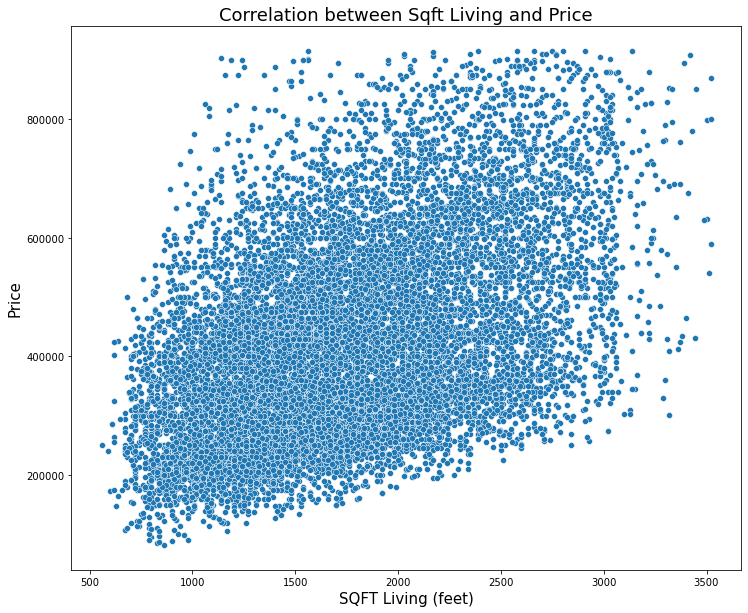

In [115]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living'], y=df['price'], ax=ax)
ax.set_title('Correlation between Sqft Living and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('SQFT Living (feet)', fontsize=15);






In [116]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,sqft_living_new,bedrooms_new,bathrooms_new,sqft_lot_new,floors_new,sqft_living15_new,sqft_lot15_new
id,1.000000,0.042207,0.000925,0.037172,0.036325,-0.041976,0.025145,NaN,NaN,-0.036881,...,0.089801,0.040949,-0.045600,0.036686,0.000921,0.037224,-0.038887,0.032891,0.035259,-0.044027
price,0.042207,1.000000,0.196410,0.303753,0.460781,-0.121519,0.195579,NaN,NaN,0.094491,...,0.002163,0.394751,-0.131268,0.454196,0.193917,0.303781,-0.122539,0.212147,0.393723,-0.132277
bedrooms,0.000925,0.196410,1.000000,0.423651,0.607728,0.225763,0.095848,NaN,NaN,0.042968,...,0.157935,0.388145,0.211228,0.616684,0.997636,0.423992,0.239946,0.141460,0.392310,0.219255
bathrooms,0.037172,0.303753,0.423651,1.000000,0.657524,-0.101148,0.513012,NaN,NaN,-0.152945,...,0.268336,0.500089,-0.107750,0.673665,0.429940,0.999977,-0.115730,0.518748,0.506207,-0.115404
sqft_living,0.036325,0.460781,0.607728,0.657524,1.000000,0.173963,0.271033,NaN,NaN,-0.046210,...,0.268354,0.696702,0.154345,0.989833,0.609053,0.657912,0.185567,0.320031,0.685100,0.160850
sqft_lot,-0.041976,-0.121519,0.225763,-0.101148,0.173963,1.000000,-0.452832,NaN,NaN,0.160726,...,0.242097,0.202394,0.893238,0.171762,0.232379,-0.100372,0.993053,-0.423308,0.202812,0.893350
floors,0.025145,0.195579,0.095848,0.513012,0.271033,-0.452832,1.000000,NaN,NaN,-0.299406,...,0.116649,0.222803,-0.455709,0.276004,0.099606,0.512425,-0.488240,0.968655,0.209603,-0.475452
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,-0.036881,0.094491,0.042968,-0.152945,-0.046210,0.160726,-0.299406,NaN,NaN,1.000000,...,-0.089969,-0.120717,0.160556,-0.042551,0.042744,-0.152292,0.171089,-0.285909,-0.111554,0.166780


In [117]:
df.corr()['price'].sort_values(ascending=False)

price                1.000000
lat                  0.519817
grade                0.479317
sqft_living          0.460781
sqft_living_new      0.454196
sqft_living15        0.394751
sqft_living15_new    0.393723
sqft_above           0.336849
bathrooms_new        0.303781
bathrooms            0.303753
floors_new           0.212147
bedrooms             0.196410
floors               0.195579
bedrooms_new         0.193917
condition            0.094491
id                   0.042207
zipcode              0.018939
long                 0.002163
yr_built            -0.058158
sqft_lot            -0.121519
sqft_lot_new        -0.122539
sqft_lot15          -0.131268
sqft_lot15_new      -0.132277
waterfront                NaN
view                      NaN
yr_renovated              NaN
Name: price, dtype: float64

In [118]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sqft_living_new,bedrooms_new,bathrooms_new,sqft_lot_new,floors_new,sqft_living15_new,sqft_lot15_new
0,7129300520,2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,-122.257,1340.0,5650.0,19.301034,1.514010,0.000000,421.559724,0.000000,5.121442,921.297930
2,5631500400,2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,-122.233,2720.0,8062.0,16.954381,0.845558,0.000000,611.731316,0.000000,5.452382,1206.726526
3,2487200875,2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,-122.393,1360.0,5000.0,22.434277,2.088405,1.950522,389.240536,0.000000,5.128611,839.644824
4,1954400510,2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,-122.045,1800.0,7503.0,21.440347,1.514010,0.985163,532.353398,0.000000,5.262268,1142.669064
7,2008000270,2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,...,-122.315,1650.0,9711.0,18.687877,1.514010,0.495827,600.149026,0.000000,5.221181,1389.792537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,-122.346,1530.0,1509.0,20.855599,1.514010,1.469727,147.138180,0.636834,5.185234,337.759438
21593,6600060120,2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,-122.362,1830.0,7200.0,23.536411,2.088405,1.469727,429.456276,0.484591,5.270033,1107.467285
21594,1523300141,2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,-122.299,1020.0,2007.0,18.471903,0.845558,-0.251332,165.271467,0.484591,4.987456,419.610601
21595,291310100,2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,-122.069,1410.0,1287.0,21.133604,1.514010,1.469727,240.157231,0.484591,5.146040,299.219709


{'whiskers': [<matplotlib.lines.Line2D at 0x12e696610>,
 'caps': [<matplotlib.lines.Line2D at 0x12e688b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e6964f0>],
 'medians': [<matplotlib.lines.Line2D at 0x12e688850>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e688e50>],
 'means': []}

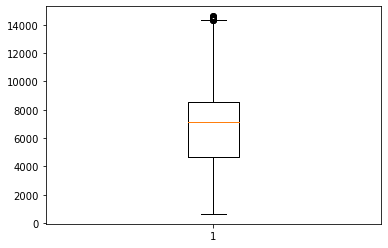

In [119]:
plt.boxplot(df['sqft_lot15'])

In [120]:
X = df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms',  'lat', 'long', 'zipcode', 'grade', 'yr_built', 'yr_renovated', 'view', 'condition', 'grade']]
y = df['price']
#X = df[['sqft_living_new', 'sqft_lot_new', 'sqft_living15_new', 'sqft_lot15_new', 'floors_new', 'bedrooms_new', 'bathrooms_new', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15', 'condition']]
#y = df[['price']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [122]:
X_train.isna().sum()

sqft_living      0
sqft_lot         0
sqft_living15    0
sqft_lot15       0
sqft_above       0
bathrooms        0
bedrooms         0
lat              0
long             0
zipcode          0
grade            0
yr_built         0
yr_renovated     0
view             0
condition        0
grade            0
dtype: int64

In [123]:
X_test.isna().sum()

sqft_living      0
sqft_lot         0
sqft_living15    0
sqft_lot15       0
sqft_above       0
bathrooms        0
bedrooms         0
lat              0
long             0
zipcode          0
grade            0
yr_built         0
yr_renovated     0
view             0
condition        0
grade            0
dtype: int64

In [124]:
lr = LinearRegression()

In [125]:
lr.fit(X_train, y_train)

LinearRegression()

In [138]:
lr.score(X_test, y_test)

0.6547290214845126

In [126]:
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))

Intercept: 3920229.030778448
Slope: [ 7.77197808e+01 -3.54684962e+00  4.36713852e+01 -6.47879732e+00
  9.54573892e+00  1.68551088e+04 -8.07031085e+03  5.19693049e+05
  2.22111871e+04 -2.32394461e+02  3.54239951e+04 -1.75845688e+03
  5.82076609e-11  0.00000000e+00  2.19874460e+04  3.54239951e+04]


In [127]:

# Make predictions for train and test set
train_preds1 = lr.predict(X_train)
test_preds1 = lr.predict(X_test)

In [128]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Training RMSE: 97221.62749470005
Testing RMSE: 96781.90483508355


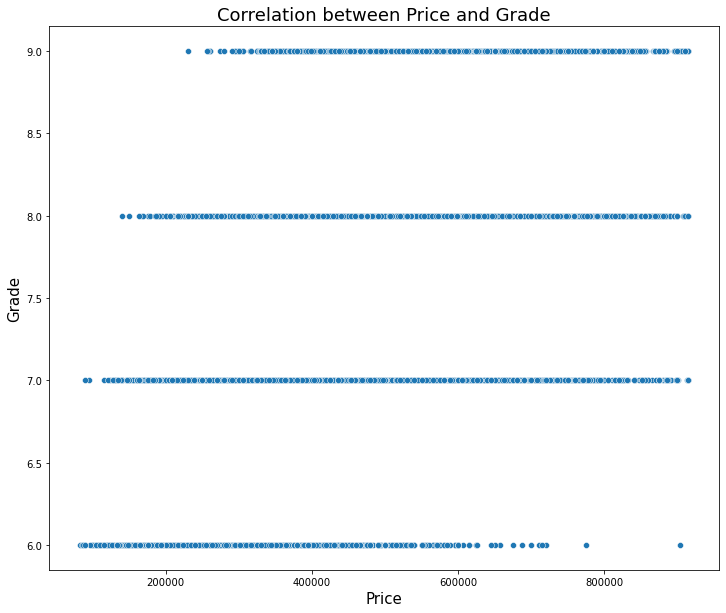

In [129]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['price'], y=df['grade'], ax=ax)
ax.set_title('Correlation between Price and Grade', fontsize=18)
ax.set_ylabel('Grade', fontsize=15)
ax.set_xlabel('Price', fontsize=15);

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

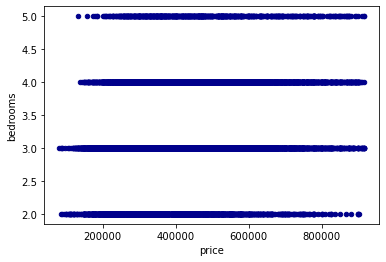

In [130]:
df.plot.scatter(x='price',y='bedrooms',c='DarkBlue')

/Users/mallorywilson/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


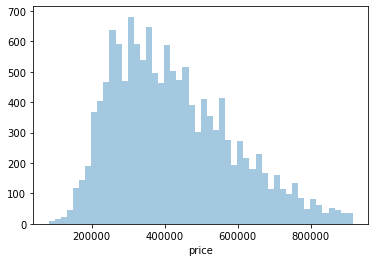

In [131]:
sns.distplot(df['price'], bins=50, kde=False);

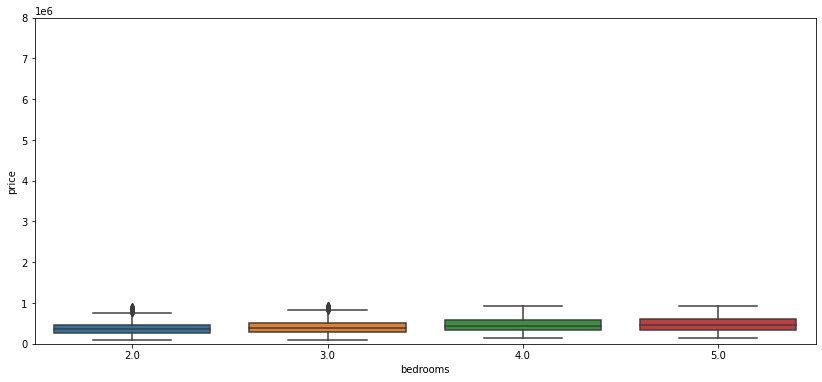

In [132]:
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

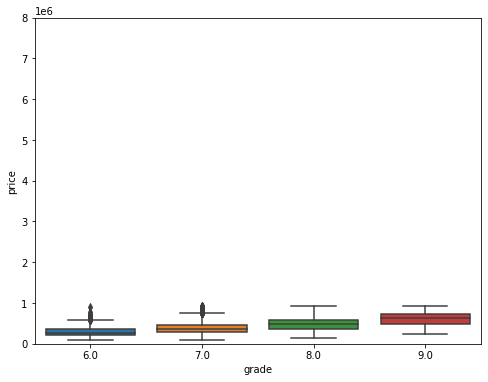

In [133]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

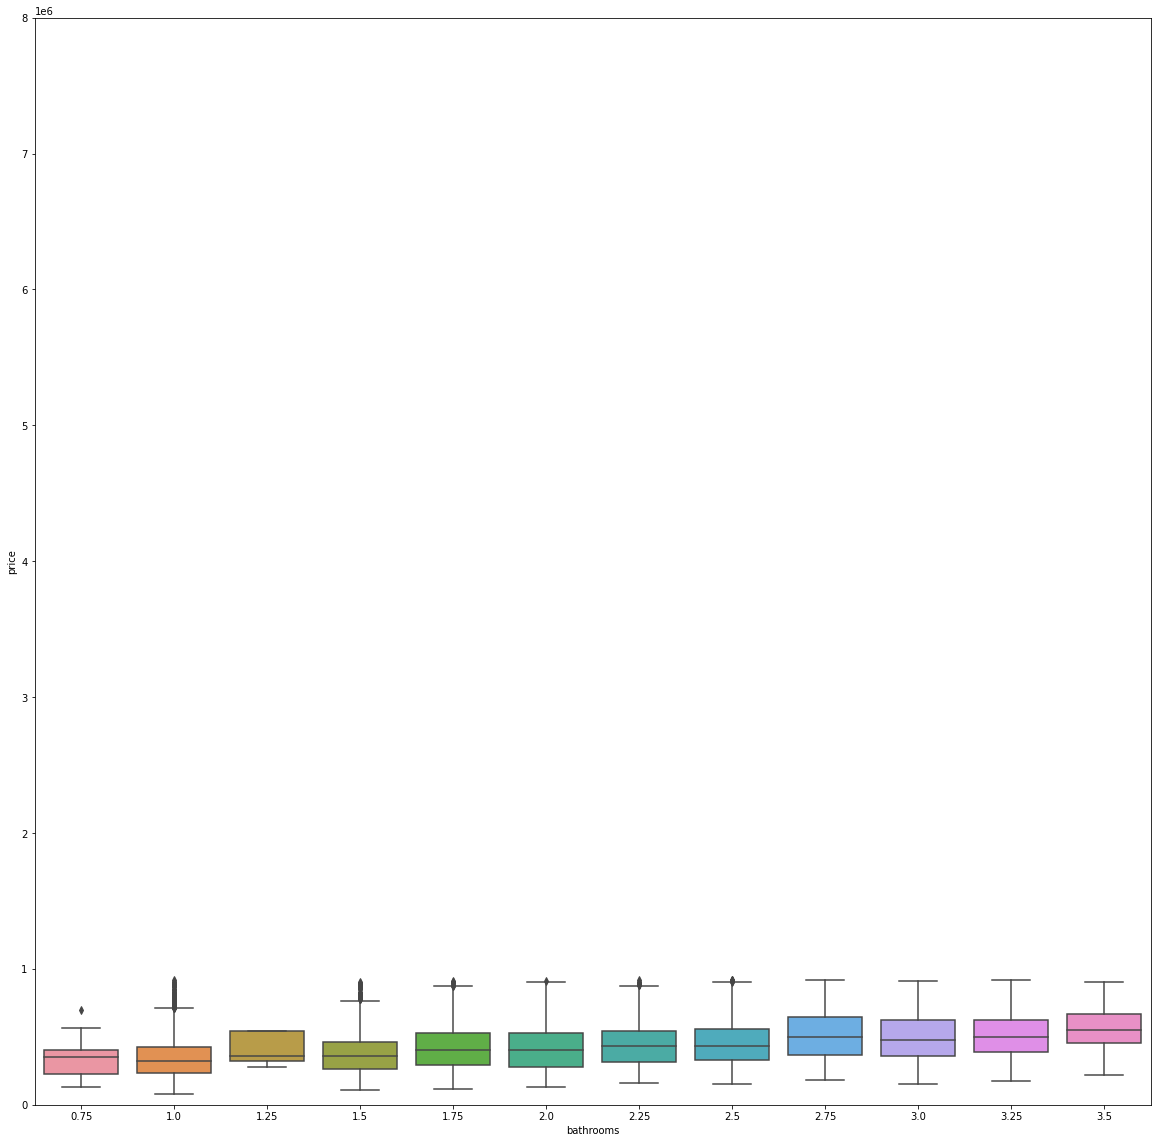

In [134]:
var = 'bathrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);


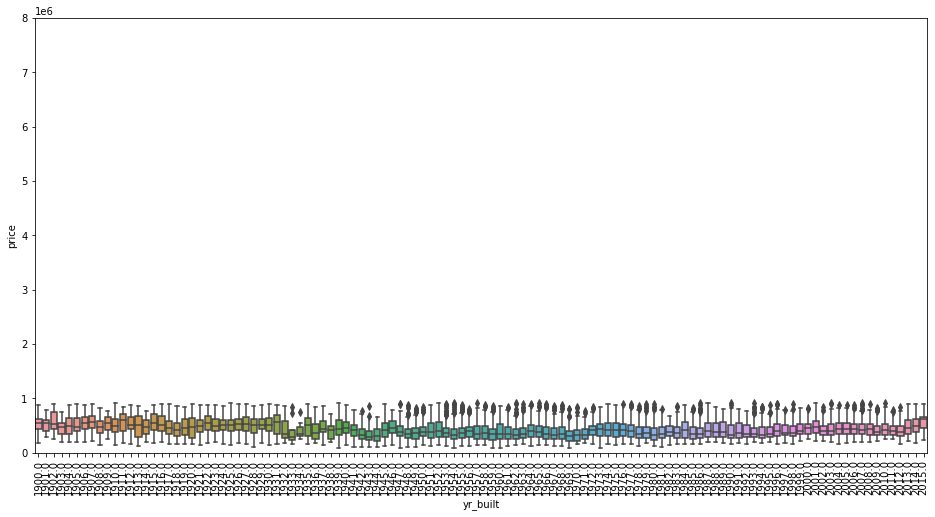

In [135]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);
plt.xticks(rotation=90);

In [136]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 7.77197808e+01 -3.54684962e+00  4.36713852e+01 -6.47879732e+00
  9.54573892e+00  1.68551088e+04 -8.07031085e+03  5.19693049e+05
  2.22111871e+04 -2.32394461e+02  3.54239951e+04 -1.75845688e+03
  5.82076609e-11  0.00000000e+00  2.19874460e+04  3.54239951e+04]
Mean Absolute Error 74147.67461306397
Mean Squared Error 9366737103.50717
Root Mean Squared Error 96781.90483508355
Variance score: 0.65


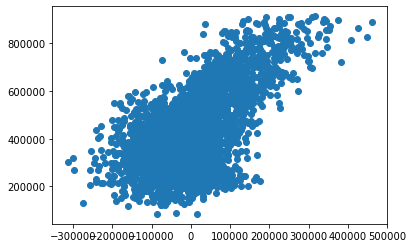

In [137]:
residuals = y_test - y_pred 
plt.scatter(residuals,y_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=df.shape[0]-1)
regr_1.fit(X_train, y_train)
y_1 = regr_1.predict(X_test)

In [53]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test, y_1))
print('Mean Squared Error',metrics.mean_squared_error(y_test, y_1))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test, y_1)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_1))

Mean Absolute Error 66133.84178046219
Mean Squared Error 8741031469.96514
Root Mean Squared Error 93493.48356952553
Variance score: 0.74


In [54]:
new_column = scipy.stats.boxcox(df['sqft_living'], lmbda=None, alpha=None)

In [55]:
df['sqft_living_new'] = new_column[0]

In [56]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_new
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,19.301034
2,5631500400,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,16.954381
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,22.434277
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,21.440347
6,1321400060,6/27/2014,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,1715.0,?,1995.0,0.0,98003,47.3097,-122.327,2238.0,6819.0,21.571101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,1530.0,0.0,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,20.855599
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,2310.0,0.0,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,23.536411
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,1020.0,0.0,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,18.471903
21595,291310100,1/16/2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,1600.0,0.0,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,21.133604


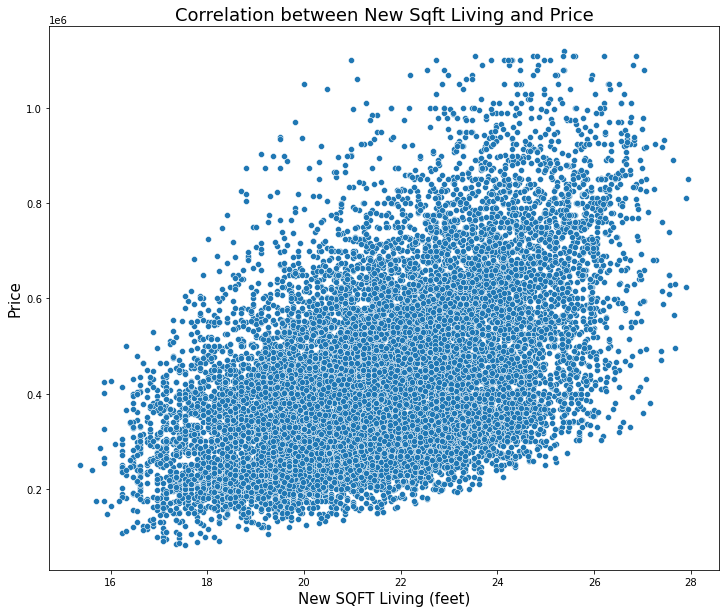

In [57]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living_new'], y=df['price'], ax=ax)
ax.set_title('Correlation between New Sqft Living and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('New SQFT Living (feet)', fontsize=15);

In [58]:
new_column = scipy.stats.boxcox(df['bedrooms'], lmbda=None, alpha=None)
df['bedrooms_new'] = new_column[0]

In [59]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_new,bedrooms_new
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,19.301034,1.514010
2,5631500400,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,16.954381,0.845558
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,22.434277,2.088405
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,21.440347,1.514010
6,1321400060,6/27/2014,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,?,1995.0,0.0,98003,47.3097,-122.327,2238.0,6819.0,21.571101,1.514010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,0.0,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,20.855599,1.514010
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,0.0,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,23.536411,2.088405
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,0.0,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,18.471903,0.845558
21595,291310100,1/16/2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,0.0,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,21.133604,1.514010


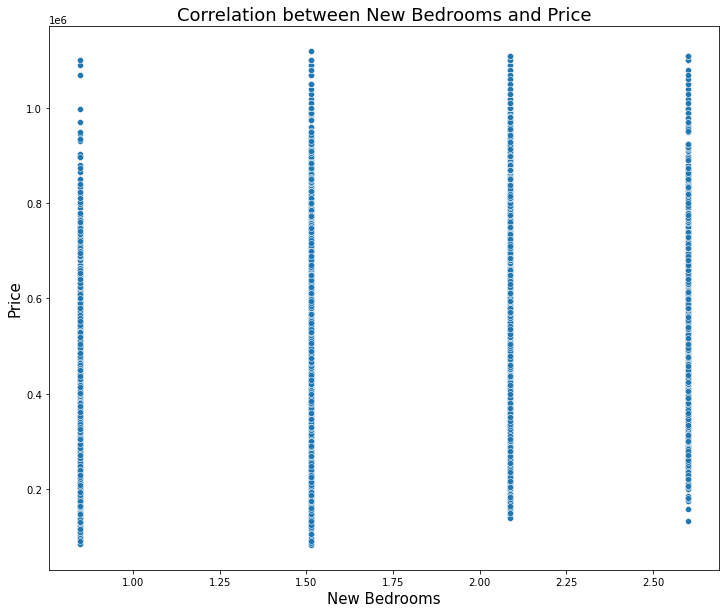

In [60]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['bedrooms_new'], y=df['price'], ax=ax)
ax.set_title('Correlation between New Bedrooms and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('New Bedrooms', fontsize=15);

In [61]:
new_column = scipy.stats.boxcox(df['bathrooms'], lmbda=None, alpha=None)
df['bathrooms_new'] = new_column[0]



In [62]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_new,bedrooms_new,bathrooms_new
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,19.301034,1.514010,0.000000
2,5631500400,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,16.954381,0.845558,0.000000
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,22.434277,2.088405,1.950522
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,21.440347,1.514010,0.985163
6,1321400060,6/27/2014,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,1995.0,0.0,98003,47.3097,-122.327,2238.0,6819.0,21.571101,1.514010,1.227968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,20.855599,1.514010,1.469727
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,23.536411,2.088405,1.469727
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,18.471903,0.845558,-0.251332
21595,291310100,1/16/2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,21.133604,1.514010,1.469727


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

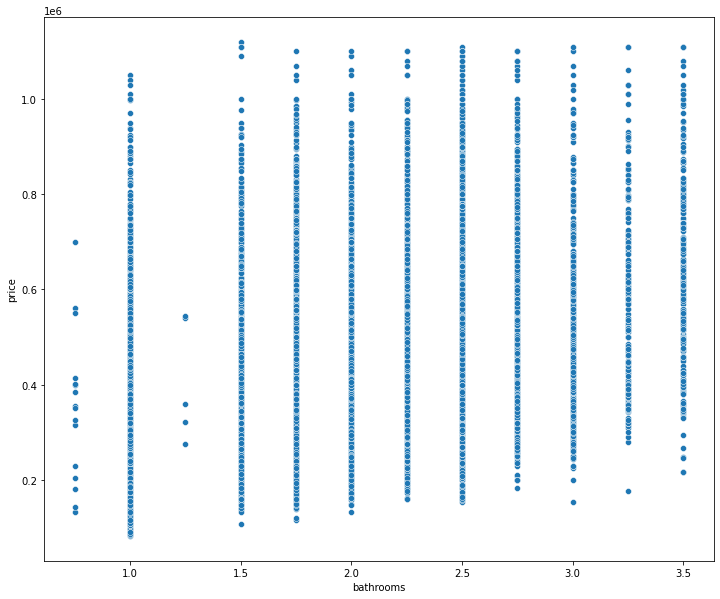

In [63]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['bathrooms'], y=df['price'], ax=ax)

<AxesSubplot:xlabel='bathrooms_new', ylabel='price'>

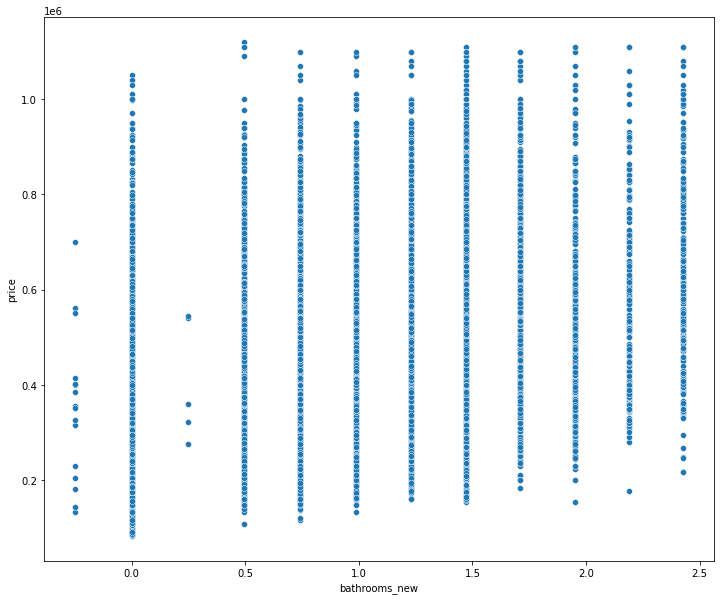

In [64]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['bathrooms_new'], y=df['price'], ax=ax)

In [65]:
new_column = scipy.stats.boxcox(df['sqft_lot'], lmbda=None, alpha=None)
df['sqft_lot_new'] = new_column[0]

<AxesSubplot:xlabel='sqft_lot_new', ylabel='price'>

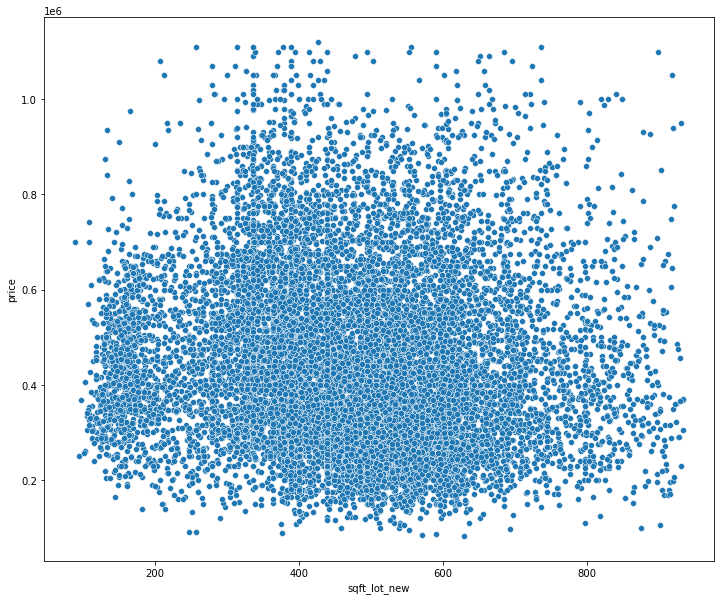

In [66]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_lot_new'], y=df['price'], ax=ax)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

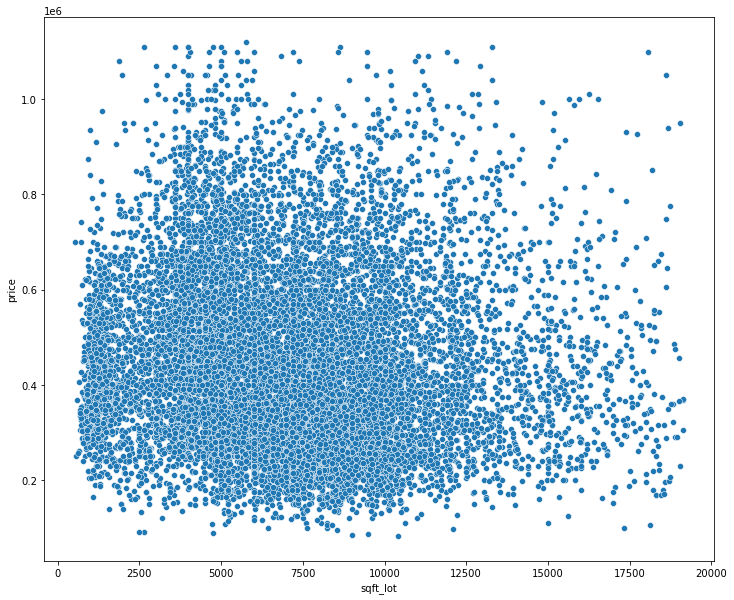

In [67]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_lot'], y=df['price'], ax=ax)

In [68]:
new_column = scipy.stats.boxcox(df['floors'], lmbda=None, alpha=None)
df['floors_new'] = new_column[0]

<AxesSubplot:xlabel='floors_new', ylabel='price'>

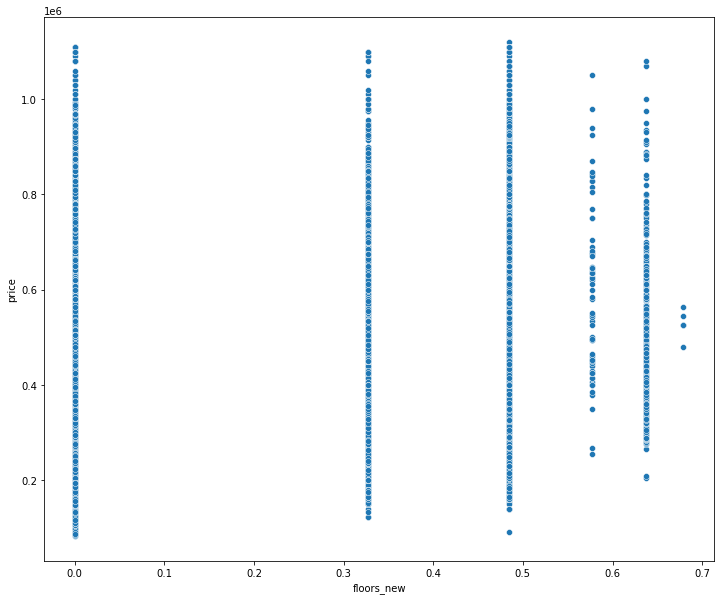

In [69]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['floors_new'], y=df['price'], ax=ax)

<AxesSubplot:xlabel='floors', ylabel='price'>

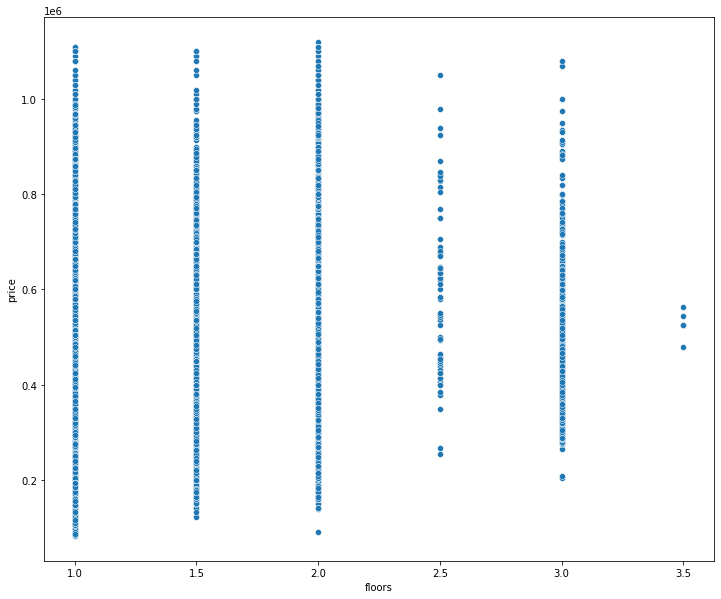

In [70]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['floors'], y=df['price'], ax=ax)

In [71]:
new_column = scipy.stats.boxcox(df['sqft_living15'], lmbda=None, alpha=None)
df['sqft_living15_new'] = new_column[0]

<AxesSubplot:xlabel='sqft_living15_new', ylabel='price'>

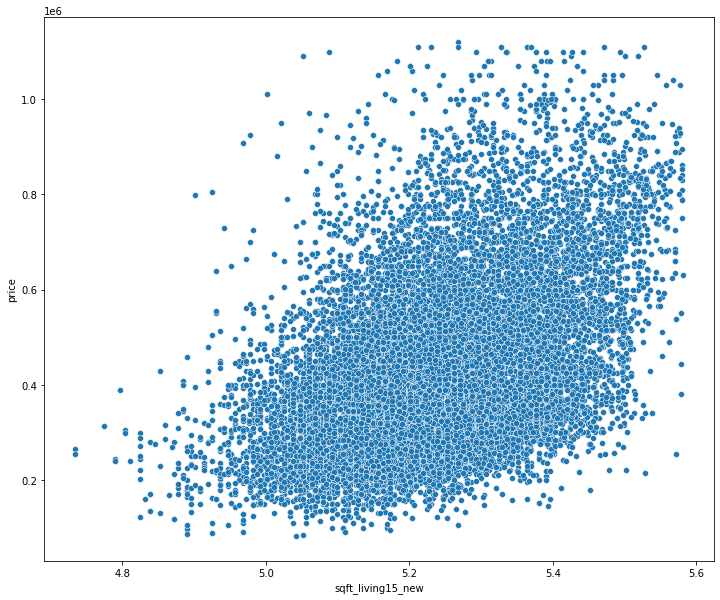

In [72]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living15_new'], y=df['price'], ax=ax)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

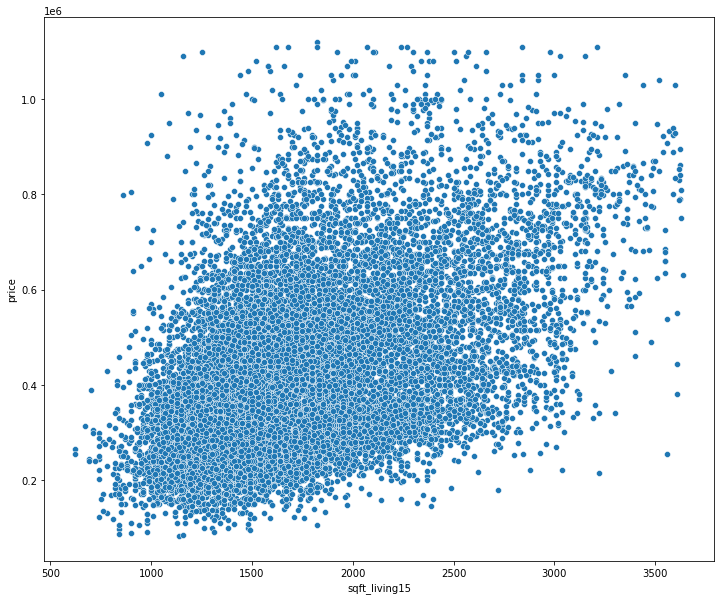

In [73]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living15'], y=df['price'], ax=ax)

In [74]:
new_column = scipy.stats.boxcox(df['sqft_lot15'], lmbda=None, alpha=None)
df['sqft_lot15_new'] = new_column[0]

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

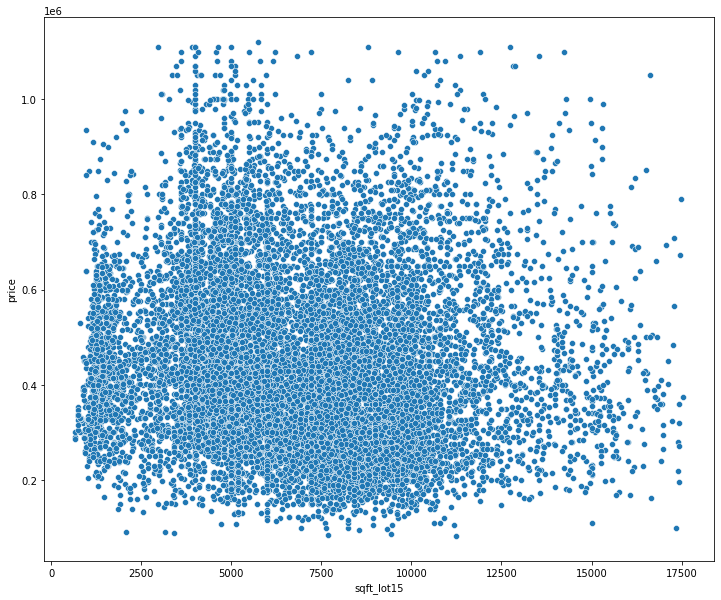

In [75]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_lot15'], y=df['price'], ax=ax)

<AxesSubplot:xlabel='sqft_lot15_new', ylabel='price'>

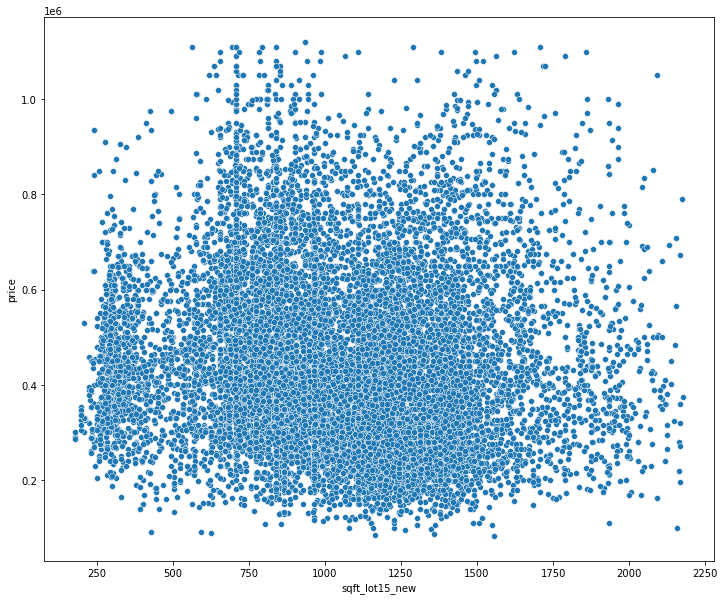

In [76]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_lot15_new'], y=df['price'], ax=ax)

In [77]:
# Isolate independent and depdentent variables
X = df.drop('price', axis = 1)
y = df['price']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [78]:
# Isolate the features for the first model
model_1_train = X_train[['sqft_living',
                         'grade']]

model_1_test = X_test[['sqft_living',
                       'grade']]

# Initialize a model
model1 = LinearRegression()

# Fit the model
model1.fit(model_1_train, y_train)

# Generate training and test predictions
train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds)
test_error = mean_squared_error(y_test, test_preds)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)

Train error: 21444790445.852497
Test error: 22191956531.780315
Difference: 747166085.9278183


In [79]:
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the first model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds)
    test_error = mean_squared_error(y_test, test_preds)
    
    # What is the difference in training and test error?
    difference = test_error - train_error
    
    # return results
    return train_error, test_error, difference

second_model_features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms']
model_2_results = model(X_train, X_test, y_train, y_test, second_model_features)
model_2_results

(21705426594.043716, 22112039216.635036, 406612622.59132004)

In [81]:
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['condition']])

# Transform the borough column
train_condition = ohe.transform(X_train[['condition']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_condition = pd.DataFrame(train_condition, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_condition = pd.concat([X_train.drop('condition', axis = 1), train_condition], axis = 1)

# Transform the testing data
test_condition = ohe.transform(X_test[['condition']])

# Turn the transformed data into a dataframe
test_condition = pd.DataFrame(test_condition, 
                        columns=ohe.get_feature_names(), index=X_test.index)

# Add the transformed columns to the X_test dataframe
test_condition = pd.concat([X_test.drop('condition', axis = 1), test_condition], axis = 1)

In [82]:
ohe.get_feature_names()

array(['x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0'], dtype=object)

In [83]:
model_three_features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'lat', 'long', 'zipcode', 'grade']#,'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']

model_3_results = model(train_condition, test_condition, y_train, y_test, model_three_features)


In [84]:
df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'lat', 'long', 'zipcode', 'grade']]

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,lat,long,zipcode,grade
0,1180.0,5650.0,1340.0,5650.0,1180.0,47.5112,-122.257,98178,7.0
2,770.0,10000.0,2720.0,8062.0,770.0,47.7379,-122.233,98028,6.0
3,1960.0,5000.0,1360.0,5000.0,1050.0,47.5208,-122.393,98136,7.0
4,1680.0,8080.0,1800.0,7503.0,1680.0,47.6168,-122.045,98074,8.0
6,1715.0,6819.0,2238.0,6819.0,1715.0,47.3097,-122.327,98003,7.0
...,...,...,...,...,...,...,...,...,...
21592,1530.0,1131.0,1530.0,1509.0,1530.0,47.6993,-122.346,98103,8.0
21593,2310.0,5813.0,1830.0,7200.0,2310.0,47.5107,-122.362,98146,8.0
21594,1020.0,1350.0,1020.0,2007.0,1020.0,47.5944,-122.299,98144,7.0
21595,1600.0,2388.0,1410.0,1287.0,1600.0,47.5345,-122.069,98027,8.0


In [85]:
print('Model 2:', model_2_results)
print('Model 3:', model_3_results)

Model 2: (21705426594.043716, 22112039216.635036, 406612622.59132004)
Model 3: (13473751494.40091, 13765501384.081839, 291749889.6809292)


In [86]:
# Initialize an imputer
imputer = SimpleImputer(add_indicator = True)

# Fit the imputer to the training data we'd like to impute
imputer.fit(X_train[['LAND SQUARE FEET']])

# Transform the training data
land_square_train = imputer.transform(X_train[['LAND SQUARE FEET']])

# Turn the transformed data into a dataframe so we 
# can use it with the other independent variables
land_square_train = pd.DataFrame(land_square_train, columns = ['land_sqft', 'land_sqft_ind'],
                                index = X_train.index)

# Transform our test data
land_square_test = imputer.transform(X_test[['LAND SQUARE FEET']])

# Turn the transformed data into a dataframe so we 
# can use it with the other independent variables
land_square_test = pd.DataFrame(land_square_test, columns = ['land_sqft', 'land_sqft_ind'],
                                index = X_test.index)

# Changing the X_train and X_test variables
# so they contain the borough data we created above
X_train, X_test = train_boroughs.copy(), test_boroughs.copy()

# Add the imputed data to our training and test dataframes
X_train = pd.concat([X_train, land_square_train], axis = 1)
X_test = pd.concat([X_test, land_square_test], axis = 1)

KeyError: "None of [Index(['LAND SQUARE FEET'], dtype='object')] are in the [columns]"

In [87]:
X_train.columns.tolist()

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_living_new',
 'bedrooms_new',
 'bathrooms_new',
 'sqft_lot_new',
 'floors_new',
 'sqft_living15_new',
 'sqft_lot15_new']

In [88]:
model_four_features = ["TAX CLASS AT TIME OF SALE", 'TOTAL UNITS',
                        'RESIDENTIAL UNITS','x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'land_sqft',
                        'land_sqft_ind']

model_4_results = model(X_train, X_test, y_train, y_test, model_four_features)

print('Model 3:', model_3_results)
print('Model 4:', model_4_results)

KeyError: "None of [Index(['TAX CLASS AT TIME OF SALE', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'x0_1',\n       'x0_2', 'x0_3', 'x0_4', 'x0_5', 'land_sqft', 'land_sqft_ind'],\n      dtype='object')] are in the [columns]"

In [89]:
# Initialize a final model
final_model = LinearRegression()

# Changing raw to df because it's easier to type
df = raw.copy()

# Replacing ' -  ' with null values
df = df.replace(' -  ', np.nan)

# Isolating the numeric features
final_model_frame = df[["TAX CLASS AT TIME OF SALE", 'TOTAL UNITS',
                        'RESIDENTIAL UNITS']]

# Initialize the first transformer object
preprocessor_1 = OneHotEncoder(sparse=False)

# Fit the encoder to the borough data
preprocessor_1 = preprocessor_1.fit(df[['BOROUGH']])

# Transform the borough column
final_borough = preprocessor_1.transform(df[['BOROUGH']])

# Turn the transformed data into a dataframe
final_borough = pd.DataFrame(final_borough, 
                             columns = preprocessor_1.get_feature_names(),
                             index = df.index)

# Add the transformed data to our modeling dataframe
final_model_frame = pd.concat([final_model_frame, final_borough], axis = 1)

# Initialize our second transformer object
preprocessor_2 = SimpleImputer(strategy='median', add_indicator=True)

# Fit the transformer to the Square Foot data
final_land_sqft = preprocessor_2.fit(df[['LAND SQUARE FEET']])

# Transform the square foot data
final_land_sqft = preprocessor_2.transform(df[['LAND SQUARE FEET']])

# Turn the transformed data into a dataframe
final_land_sqft = pd.DataFrame(final_land_sqft, 
                               columns = ['land_sqft', 'land_sqft_ind'],
                               index= df.index)

# Add the transformed data to our modeling dataframe
final_model_frame = pd.concat([final_model_frame, final_land_sqft], axis = 1)

NameError: name 'raw' is not defined

In [90]:
final_model.fit(final_model_frame, df['SALE PRICE'])

NameError: name 'final_model_frame' is not defined

In [ ]:
# ================ PREPROCESSING ====================

# Import the testing data
test_df = pd.read_csv('flatiron-regression-housing/testing.csv')

# Replace ' -  ' with np.nan
test_df = test_df.replace(' -  ', np.nan)

# Isolate numeric features
test_model_frame = test_df[["TAX CLASS AT TIME OF SALE", 'TOTAL UNITS',
                        'RESIDENTIAL UNITS']]

# Onehotencode the borough column
final_borough = preprocessor_1.transform(test_df[['BOROUGH']])

# Turn the transformed data into a dataframe
final_borough = pd.DataFrame(final_borough, columns = ohe.get_feature_names(),
                             index = test_df.index)

# Add the transformed data to our modeling dataframe
test_model_frame = pd.concat([test_model_frame, final_borough], axis = 1)

# Impute the LAND SQUARE FEET column
final_land_sqft = preprocessor_2.transform(test_df[['LAND SQUARE FEET']])

# Turn the transformed data into a dataframe
final_land_sqft = pd.DataFrame(final_land_sqft, 
                               columns = ['land_sqft', 'land_sqft_ind'],
                               index= test_df.index)

# Add the transformed data to our modeling dataframe
test_model_frame = pd.concat([test_model_frame, final_land_sqft], axis = 1)

In [ ]:
# Generate submission predictions
final_preds = final_model.predict(test_model_frame)

In [ ]:
# Add the predictions to the original testing data
test_df['target'] = final_preds

# Isolate the `id` and `target` columns
# and save the isolated columns to a csv file
test_df[['id', 'target']].to_csv('joéls_preds.csv', index=False)

In [ ]:
for x in ['sqft_living']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
df.isnull().sum()

In [ ]:
lr.score(X_test, y_test)